In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [60]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [62]:
df.drop('id',axis=1, inplace=True)

Drop the `id` column because it is a unique identifier and has no predictive power for stroke analysis.

In [63]:
column_names = [ 'gender',  'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',  'smoking_status', 'stroke']

for col in column_names:
    print(df[col].value_counts())
    print("*"*50)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
**************************************************
hypertension
0    4612
1     498
Name: count, dtype: int64
**************************************************
heart_disease
0    4834
1     276
Name: count, dtype: int64
**************************************************
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
**************************************************
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
**************************************************
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
**************************************************
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
**************************************************
stroke
0    4861
1     249
Name

In [64]:
df = df[df['gender']!='Other']
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

Dropped the one "Other" gender row since it is too rare to contribute meaningful insights and may distort categorical analysis.

In [65]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [66]:
df['work_type'] = df['work_type'].replace({
    'children': 'Children',
    'Govt_job': 'Govt_Job',
    'Never_worked': 'Never_Worked',
    'Self-employed': 'Self_Employed'
})

Corrected inconsistent labels in the work_type column (example: Self-employed → Self_Employed, Govt_job → Govt_Job) so that categories follow a consistent naming format.


In [67]:
df['work_type'].unique()

array(['Private', 'Self_Employed', 'Govt_Job', 'Children', 'Never_Worked'],
      dtype=object)

In [68]:
df.duplicated().sum()

0

In [69]:
df['bmi'].isna().sum()

201

In [70]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

Filled missing BMI values using the median, since it is less affected by extreme values.

In [71]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [72]:
df['smoking_status'] = df['smoking_status'].str.title()

Standardized smoking_status labels by converting them to title case for cleaner categorical analysis.

In [73]:
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type']

for col in cat_cols:
    df[col] = df[col].astype('category')


Converted selected columns to the category datatype to optimize memory and explicitly mark them as categorical for analysis.

In [76]:
df.columns = [col.title() for col in df.columns]

In [78]:
df = df.rename(columns={
    'Bmi':'BMI'
})

Reformatted all column names to title case for cleaner.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             5109 non-null   category
 1   Age                5109 non-null   float64 
 2   Hypertension       5109 non-null   int64   
 3   Heart_Disease      5109 non-null   int64   
 4   Ever_Married       5109 non-null   category
 5   Work_Type          5109 non-null   category
 6   Residence_Type     5109 non-null   category
 7   Avg_Glucose_Level  5109 non-null   float64 
 8   BMI                5109 non-null   float64 
 9   Smoking_Status     5109 non-null   object  
 10  Stroke             5109 non-null   int64   
dtypes: category(4), float64(3), int64(3), object(1)
memory usage: 339.8+ KB


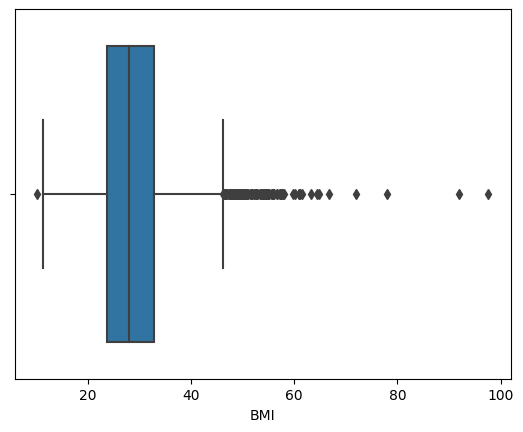

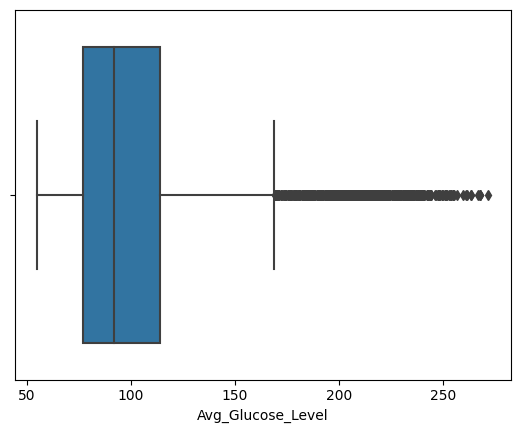

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['BMI'])
plt.show()

sns.boxplot(x=df['Avg_Glucose_Level'])
plt.show()


## Interpretation
Both BMI and glucose levels show right-sided outliers, representing individuals with extremely high values. These outliers are medically realistic (e.g., obesity, hyperglycemia) and are important risk indicators for stroke.

## Decision
Outliers were not removed, as they contain meaningful clinical information and reflect true patient variability. For this EDA project, they will be analyzed rather than cleaned.

<Axes: xlabel='Age'>

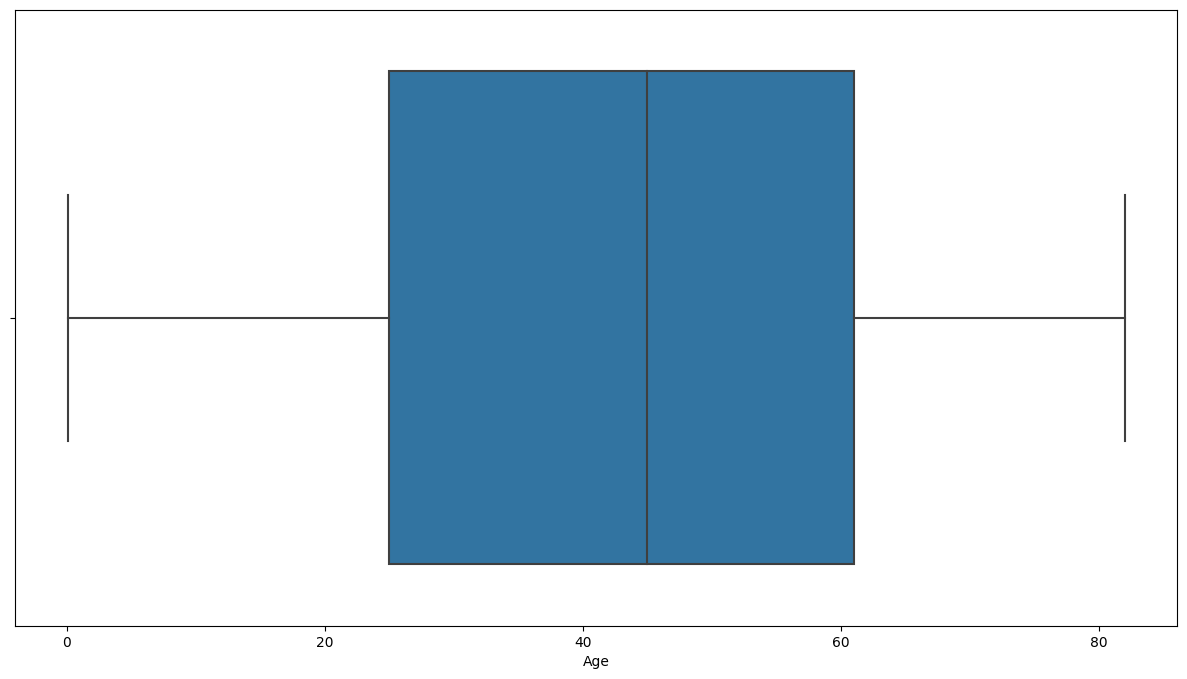

In [87]:
plt.figure(figsize =(15,8))
sns.boxplot(data=df,x='Age')

In [89]:
df.to_csv("cleaned_day2.csv",index=False)